In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.integrate import quad
from scipy.optimize import fsolve
from tqdm import tqdm

# Use latex for text rendering
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
def H(x):
    return erfc(x/np.sqrt(2))/2

def gauss(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def to_integrate(x, q):
    return gauss(x) * np.exp( - q * x**2 / 2) / (H( - np.sqrt(q) * x) + 1e-4)

In [3]:
def state_equation(alpha, q=0.01, scale=10, toll=1e-8, max_iter=1000, damping=0.9, verbose=False):
    for i in range(max_iter):
        q_new = np.sqrt(1 - q) * alpha / np.pi * quad(to_integrate, -scale, scale, args=(q))[0]

        if abs(q_new - q) < toll:
            break
        q = (1-damping)*q_new + damping*q

        if verbose:
            print(i+1, q_new, abs(q_new - q))

    print('Final q:', q_new)
    return q_new

In [4]:
state_equation(8, verbose=True)

1 5.073324392151516 4.5569919529363645
2 3.786699557511821 2.9433304064670027
3 2.2383522028515968 1.2554847466261005
4 0.7513372695797004 0.2083771679812163
5 1.1493682957487559 0.17068847236905527
6 0.8377843771212827 0.1268059016325761
7 1.0781163478895384 0.10217346222211154
8 0.8896846575647039 0.07763240529245052
9 1.0360665656303534 0.06187455249587903
10 0.9213251648702283 0.047580163437821454
11 1.0107448256367981 0.03765554759587353
12 0.9406955503416319 0.02915435492936347
13 0.9953717894311522 0.022969695744141205
14 0.9525628761687043 0.017855295766476154
15 0.9860047788682372 0.014027946239751121
16 0.9598317446993427 0.010930579136228968
17 0.9802873496528712 0.008572523235569562
18 0.9642822283858584 0.00668933822829898
19 0.9767944156112625 0.0052405640973945955
20 0.9670061782716319 0.004092905918012368
21 0.9746594485192613 0.003204327896655257
22 0.9686729810250343 0.0025039256378145414
23 0.9733541462361097 0.0019595156159347704
24 0.9696927410157208 0.001531700644

0.9712991989053373

In [5]:
alpha_list = np.concatenate([[0],np.logspace(-2, np.log(8)/np.log(10), 256)])

q_list = [state_equation(alpha) for alpha in alpha_list]

Final q: 0.0
Final q: 0.006350177191711812
Final q: 0.006518440280336189
Final q: 0.006691150877671782
Final q: 0.006868425938490367
Final q: 0.007050385470892082
Final q: 0.007237152593702945
Final q: 0.007428853633508521
Final q: 0.0076256181986453534
Final q: 0.007827579253557074
Final q: 0.008034873220658633
Final q: 0.00824764005654148
Final q: 0.008466023340835923
Final q: 0.008690170380132239
Final q: 0.00892023227953585
Final q: 0.009156364060823723
Final q: 0.009398724744621487
Final q: 0.009647477458624541
Final q: 0.009902789535636888
Final q: 0.0101648327032452
Final q: 0.010433782882299111
Final q: 0.010709820739939395
Final q: 0.010993131520681891
Final q: 0.011283905217057872
Final q: 0.011582336706897983
Final q: 0.011888625858546683
Final q: 0.012202977648995313
Final q: 0.012525602316180672
Final q: 0.012856715456546278
Final q: 0.013196538173885379
Final q: 0.013545297209085563
Final q: 0.013903225077088605
Final q: 0.014270560206794214
Final q: 0.0146475470839481
Fi

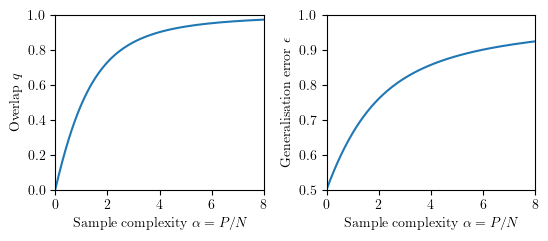

In [7]:
plt.subplots(figsize=(6, 2.5))
# I want the figure to have this size but the plots to have a different size
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
# put more space between the two plots
plt.subplots_adjust(wspace=0.3)


plt.subplot(1, 2, 1)

plt.plot(alpha_list, q_list)

plt.xlabel(r'Sample complexity $\alpha = P / N$')
plt.ylabel(r'Overlap $q$')

plt.xlim(0, 8)
plt.ylim(0, 1)

plt.subplot(1, 2, 2)

plt.plot(alpha_list, 0.5 + np.arcsin(q_list) / np.pi)

plt.xlabel(r'Sample complexity $\alpha = P / N$')
plt.ylabel(r'Generalisation error $\epsilon$')

plt.xlim(0, 8)
plt.ylim(0.5, 1.)

plt.savefig('BO_perceptron.pdf')